**Loading data**

In [1]:
import pandas as pd 

train = pd.read_csv(r'C:\Users\Shant\OneDrive\Рабочий стол/train.csv')
stores = pd.read_csv(r'C:\Users\Shant\OneDrive\Рабочий стол/stores.csv')
features = pd.read_csv(r'C:\Users\Shant\OneDrive\Рабочий стол/features.csv')

**Import libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler


from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


**Combine all datasets into one table**

In [7]:
data = train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

**Checking for passes**

In [9]:
data.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

**Processing passes**

In [10]:
data['MarkDown1'].fillna(value=0,inplace=True)
data['MarkDown2'].fillna(value=0,inplace=True)
data['MarkDown3'].fillna(value=0,inplace=True)
data['MarkDown4'].fillna(value=0,inplace=True)
data['MarkDown5'].fillna(value=0,inplace=True)

**Removing an extra column**

In [11]:
data.drop(['IsHoliday_y'], axis=1,inplace=True)

In [12]:
data.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [13]:
data.shape

(421570, 16)

**Exploratory Data Analysis**

<Axes: >

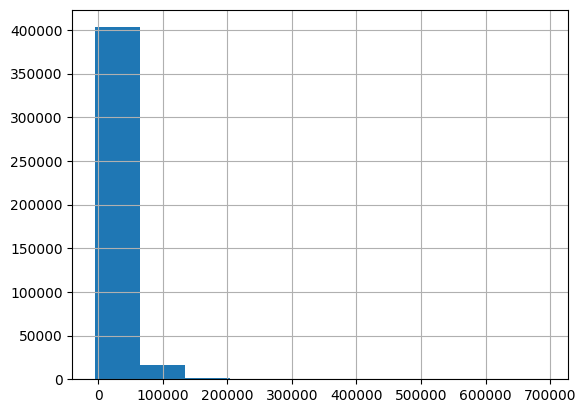

In [14]:
data['Weekly_Sales'].hist()

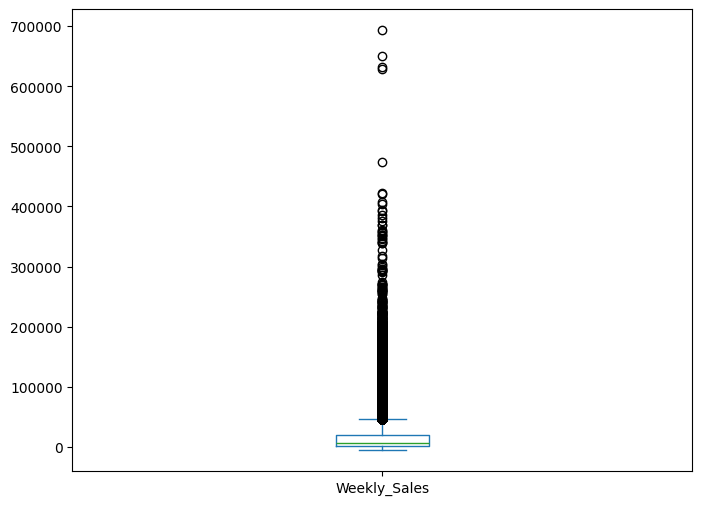

In [15]:
plt.figure(figsize=(8,6))
data['Weekly_Sales'].plot(kind='box')
plt.show()

**Remove outliers in the target variable**

In [16]:
data = data[data['Weekly_Sales'] < 100000] 

<Axes: >

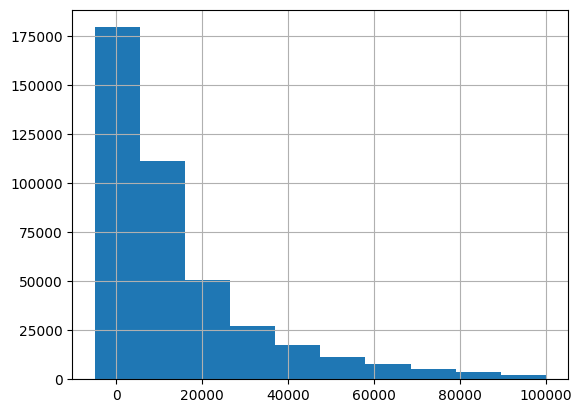

In [17]:
data['Weekly_Sales'].hist()

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

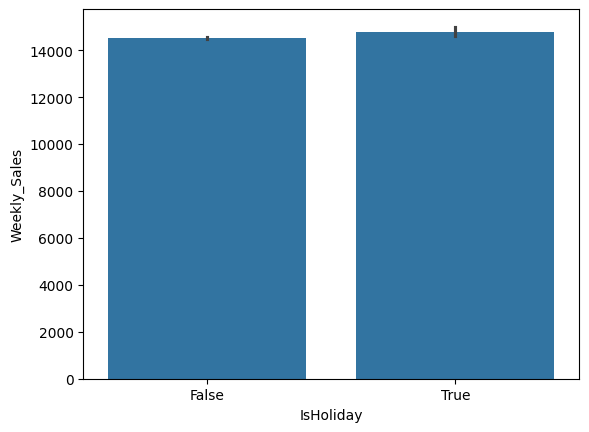

In [18]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=data)

**Pull out the dates of important holidays from the Date column and write them in our table**

In [19]:
data_holiday = data.loc[data['IsHoliday']==True]
data_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [20]:
data_not_holiday = data.loc[data['IsHoliday']==False]
data_not_holiday['Date'].nunique() 

133

In [21]:
data.loc[(data['Date'] == '2010-02-12')|(data['Date'] == '2011-02-11')|(data['Date'] == '2012-02-10'),'Super_Bowl'] = True
data.loc[(data['Date'] != '2010-02-12')&(data['Date'] != '2011-02-11')&(data['Date'] != '2012-02-10'),'Super_Bowl'] = False

C:\Users\Shant\AppData\Local\Temp\ipykernel_2916\6901265.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Date'] == '2010-02-12')|(data['Date'] == '2011-02-11')|(data['Date'] == '2012-02-10'),'Super_Bowl'] = True


In [22]:
data.loc[(data['Date'] == '2010-09-10')|(data['Date'] == '2011-09-09')|(data['Date'] == '2012-09-07'),'Labor_Day'] = True
data.loc[(data['Date'] != '2010-09-10')&(data['Date'] != '2011-09-09')&(data['Date'] != '2012-09-07'),'Labor_Day'] = False

C:\Users\Shant\AppData\Local\Temp\ipykernel_2916\1309189770.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Date'] == '2010-09-10')|(data['Date'] == '2011-09-09')|(data['Date'] == '2012-09-07'),'Labor_Day'] = True


In [23]:
data.loc[(data['Date'] == '2010-11-26')|(data['Date'] == '2011-11-25'),'Thanksgiving'] = True
data.loc[(data['Date'] != '2010-11-26')&(data['Date'] != '2011-11-25'),'Thanksgiving'] = False

C:\Users\Shant\AppData\Local\Temp\ipykernel_2916\1317508798.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Date'] == '2010-11-26')|(data['Date'] == '2011-11-25'),'Thanksgiving'] = True


In [24]:
data.loc[(data['Date'] == '2010-12-31')|(data['Date'] == '2011-12-30'),'Christmas'] = True
data.loc[(data['Date'] != '2010-12-31')&(data['Date'] != '2011-12-30'),'Christmas'] = False

C:\Users\Shant\AppData\Local\Temp\ipykernel_2916\3145913379.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[(data['Date'] == '2010-12-31')|(data['Date'] == '2011-12-30'),'Christmas'] = True


In [25]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,False,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,False,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,False,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,False,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False,False,False,False
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False,False,False,False
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False,False,False,False
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,False,False,False,False


<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

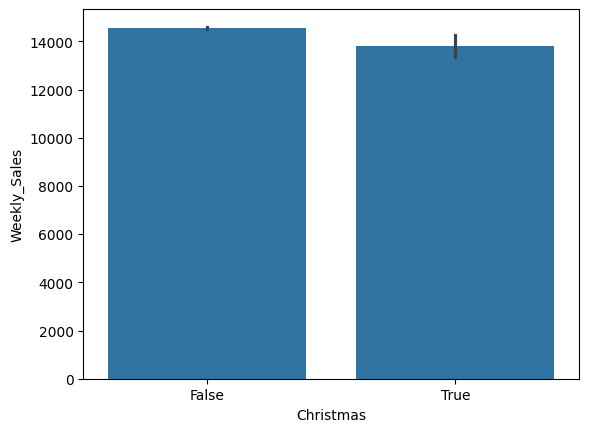

In [26]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=data)

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

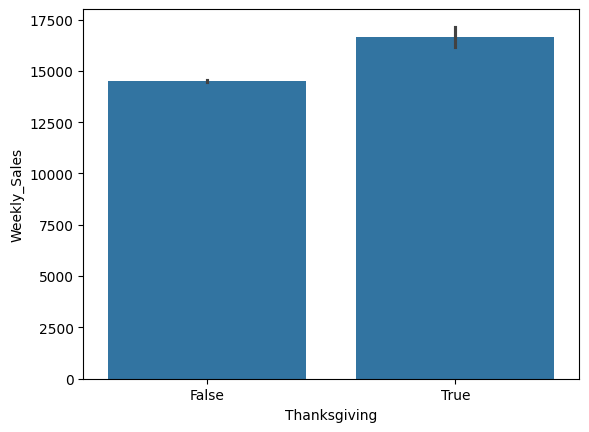

In [27]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=data)

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

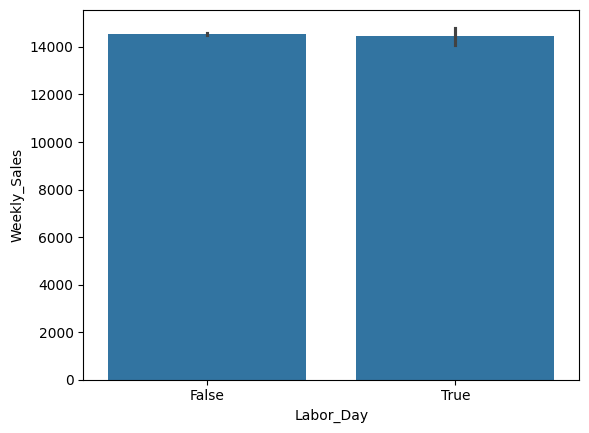

In [28]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=data)

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

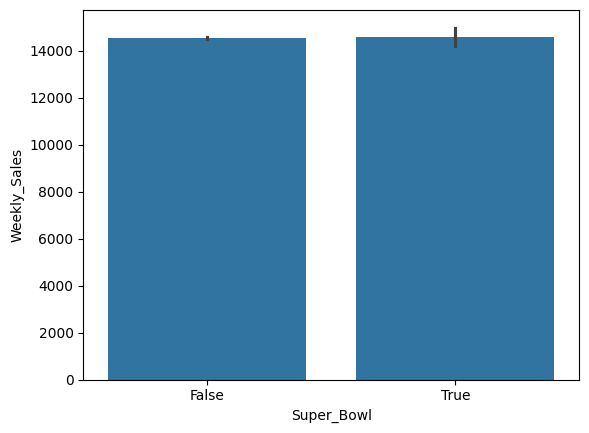

In [29]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=data)

In [30]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [31]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,Year,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,...,211.096358,8.106,A,151315,False,False,False,False,2010,2
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,...,211.096358,8.106,A,151315,False,False,False,False,2010,2
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,...,211.096358,8.106,A,151315,False,False,False,False,2010,2
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,...,211.096358,8.106,A,151315,False,False,False,False,2010,2
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,...,211.096358,8.106,A,151315,False,False,False,False,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,192.308899,8.667,B,118221,False,False,False,False,2012,10
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,192.308899,8.667,B,118221,False,False,False,False,2012,10
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,192.308899,8.667,B,118221,False,False,False,False,2012,10
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,192.308899,8.667,B,118221,False,False,False,False,2012,10


**Average Monthly Sales**

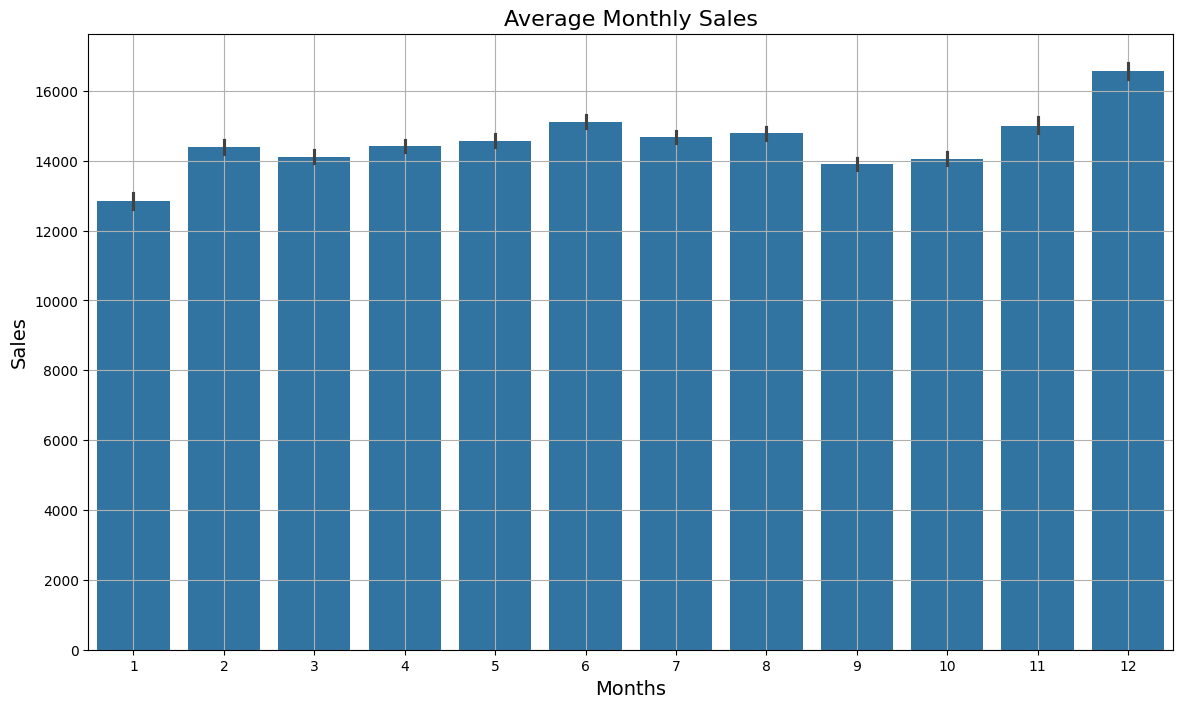

In [32]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('avg_monthly_sales.png')
plt.grid()

<Axes: xlabel='Month'>

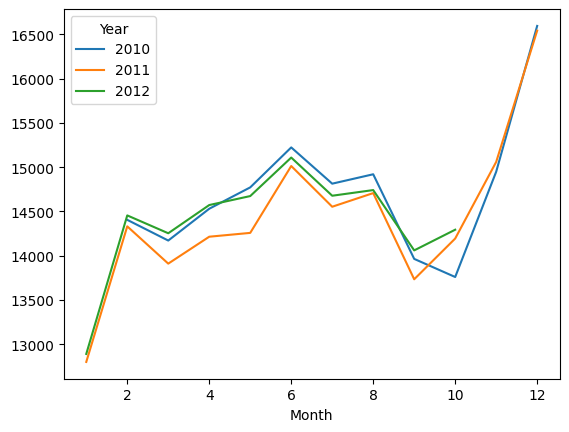

In [33]:
monthly_sales = pd.pivot_table(data, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

**Average Year Sales**

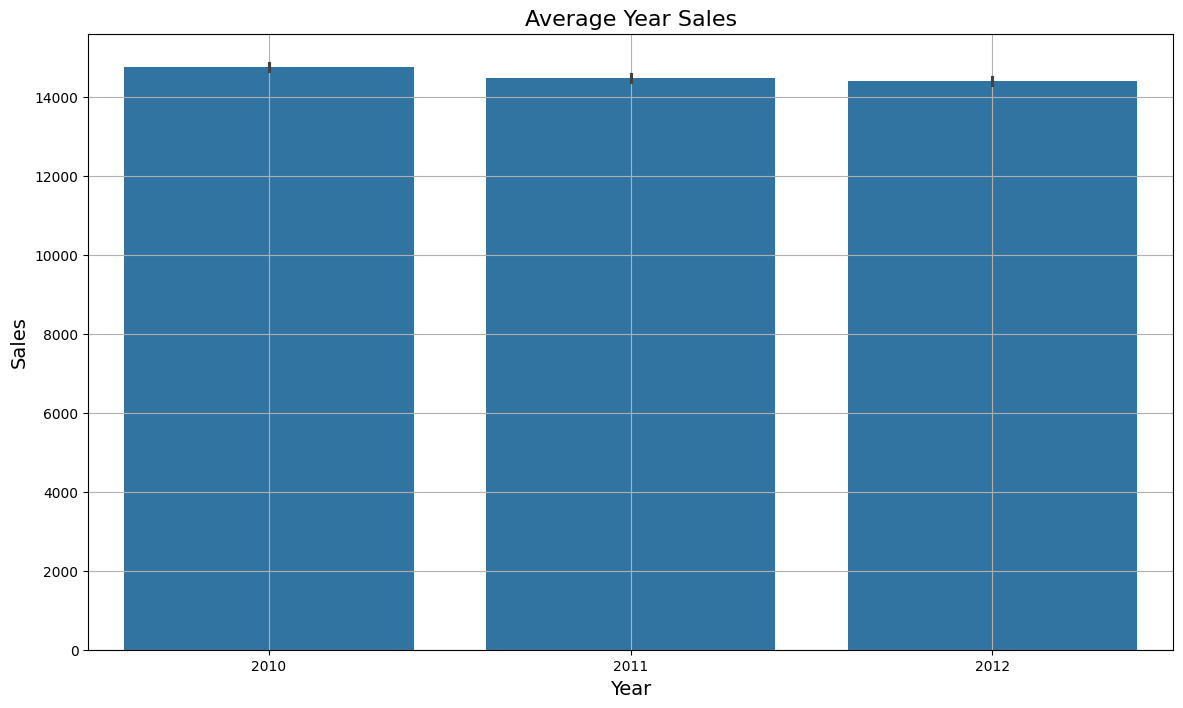

In [34]:
plt.figure(figsize=(14,8))
sns.barplot(x='Year',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Average Year Sales',fontsize=16)
plt.savefig('avg_monthly_sales.png')
plt.grid()

**Effect of Temperature**

C:\Users\Shant\AppData\Local\Temp\ipykernel_2916\1590930293.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


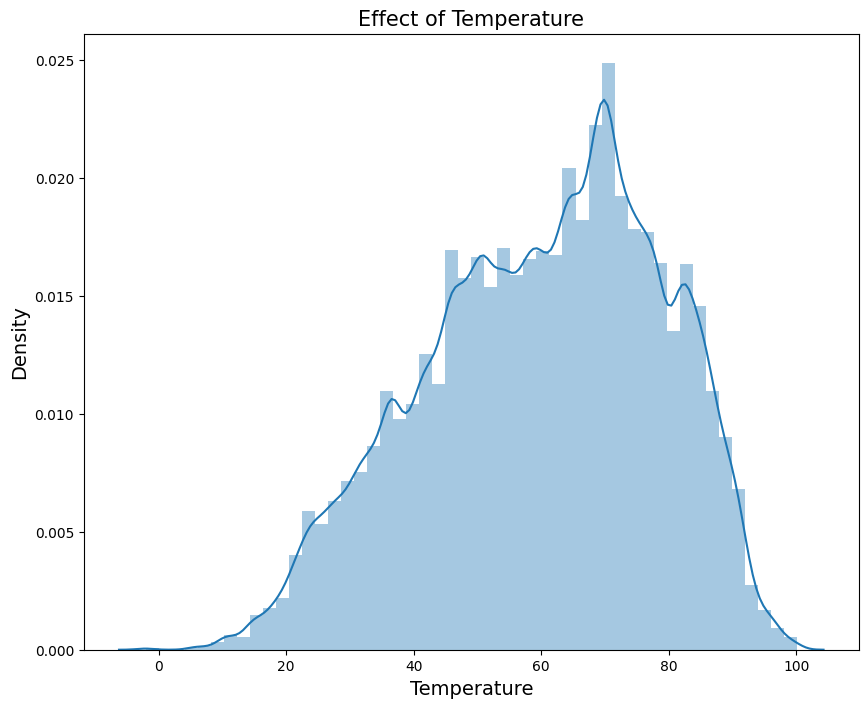

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.savefig('effect_of_temp.png')
plt.show()

**look at the correlation of features**

In [36]:
data_num = data.select_dtypes(include=['int', 'float64']).copy()

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'Year', 'Month'],
      dtype='object')

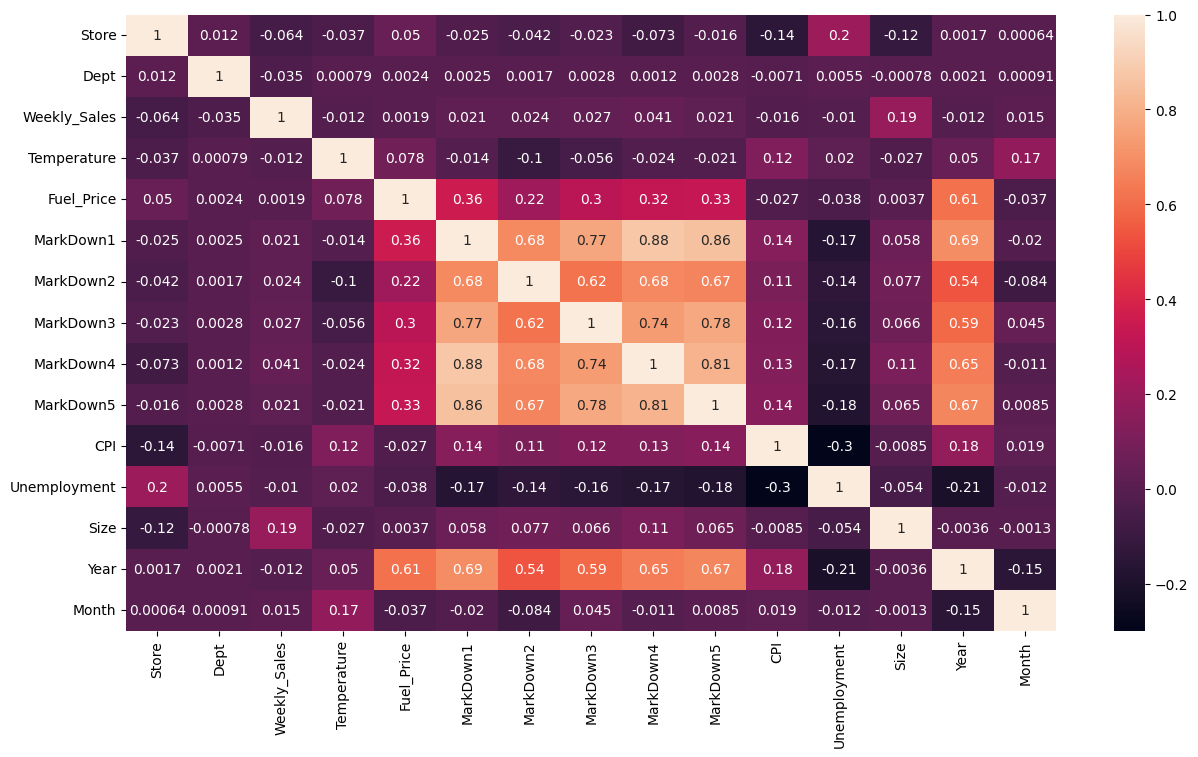

In [37]:
corr = data_num.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data_num.columns

**Data preprocessing**

In [38]:
data_encoded = data.copy()

In [39]:
type_group = {'A':1, 'B': 2, 'C': 3}  
data_encoded['Type'] = data_encoded['Type'].replace(type_group)

In [40]:
data_encoded['Super_Bowl'] = data_encoded['Super_Bowl'].astype(bool).astype(int)

In [41]:
data_encoded['Thanksgiving'] = data_encoded['Thanksgiving'].astype(bool).astype(int)

In [42]:
data_encoded['Labor_Day'] = data_encoded['Labor_Day'].astype(bool).astype(int)

In [43]:
data_encoded['Christmas'] = data_encoded['Christmas'].astype(bool).astype(int)

In [44]:
data_encoded['IsHoliday'] = data_encoded['IsHoliday'].astype(bool).astype(int)

In [45]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416430 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         416430 non-null  int64         
 1   Dept          416430 non-null  int64         
 2   Date          416430 non-null  datetime64[ns]
 3   Weekly_Sales  416430 non-null  float64       
 4   IsHoliday     416430 non-null  int32         
 5   Temperature   416430 non-null  float64       
 6   Fuel_Price    416430 non-null  float64       
 7   MarkDown1     416430 non-null  float64       
 8   MarkDown2     416430 non-null  float64       
 9   MarkDown3     416430 non-null  float64       
 10  MarkDown4     416430 non-null  float64       
 11  MarkDown5     416430 non-null  float64       
 12  CPI           416430 non-null  float64       
 13  Unemployment  416430 non-null  float64       
 14  Type          416430 non-null  int64         
 15  Size          416430 n

In [46]:
data = data_encoded

In [47]:
data = data.drop('Date', axis=1)

In [48]:
y = data['Weekly_Sales']
data = data.drop('Weekly_Sales', axis=1)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state=42)

**Baseline modeling with RandomForestRegressor**

In [50]:
from sklearn.pipeline import make_pipeline, Pipeline
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

**The metric of the competition is weighted mean absolute error (WMAE). Weight of the error changes when it is holiday**

In [ ]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [51]:
print('WMAE', wmae_test(y_test, y_pred_test))
print("MAE" , metrics.mean_absolute_error(y_test, y_pred_test))
print("R2" , metrics.explained_variance_score(y_test, y_pred_test))

MAE 6613.9114030944975
MSE 99728531.02017608
RMSE 9986.417326557912


**Remove correlated features and features with small weights**

In [54]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment', 'Super_Bowl', 'Labor_Day', 'Thanksgiving','Christmas']
X1_train = X_train.drop(drop_col, axis=1, inplace=True)
X1_test = X_test.drop(drop_col, axis=1, inplace=True)

In [57]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)
print('WMAE', wmae_test(y_test, y_pred_test))
print("MAE" , metrics.mean_absolute_error(y_test, y_pred_test))
print("R2" , metrics.explained_variance_score(y_test, y_pred_test))

4215.794479853744

In [60]:
xgbr = XGBRegressor()
xgbr.fit(X1_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
y_pred = xgbr.predict(X1_test)

In [62]:
print('WMAE', wmae_test(y_test, y_pred_test))
print("MAE" , metrics.mean_absolute_error(y_test, y_pred_test))
print("R2" , metrics.explained_variance_score(y_test, y_pred_test))

MAE 2982.493754493377
MSE 25716782.871343564
RMSE 5071.171745400028
R2 0.9243822101837752


In [67]:
from sklearn.model_selection import KFold

xgb_cv_scores, xgb_preds = list(), list()
rf_cv_scores, rf_preds = list(), list()

kf = KFold(n_splits=4, random_state=42, shuffle=True)

for i, (train_ix, test_ix) in enumerate(kf.split(X1_train)):
    X_train, X_test = X1_train.iloc[train_ix], X1_train.iloc[test_ix]
    Y_train, Y_test = y_train.iloc[train_ix], y_train.iloc[test_ix]
    
    
    xgb_md = XGBRegressor(colsample_bytree=0.4, gamma=0, learning_rate=0.07,
                          max_depth=10, min_child_weight=1.5, n_estimators=1000,                                                                    
                          subsample=0.6, random_state=42).fit(X_train, Y_train)
    xgb_pred = xgb_md.predict(X_test)   
    xgb_score_fold = wmae_test(Y_test, xgb_pred)
    print('Fold', i+1, '==> XGBoost oof WMAE score is ==>', xgb_score_fold)
    xgb_cv_scores.append(xgb_score_fold)
    
    xgb_pred_test = xgb_md.predict(X1_test)
    xgb_preds.append(xgb_pred_test)

    
    rf_md = RandomForestRegressor(random_state=42,
                                  n_jobs=-1).fit(X_train, Y_train)
    rf_pred = rf_md.predict(X_test) 
    rf_score_fold = (wmae_test(Y_test, rf_pred))
    print('Fold', i+1, '==> RF oof WMAE score is ==>', rf_score_fold)
    rf_cv_scores.append(rf_score_fold)
    
    rf_pred_test = rf_md.predict(X1_test)
    rf_preds.append(rf_pred_test) 
    
print('Average MAE of XGBoost model is:', np.mean(xgb_cv_scores))
print('Average MAE of RF model is:', np.mean(rf_cv_scores))

Fold 1 ==> XGBoost oof WMAE score is ==> 2227.476704277306
Fold 1 ==> RF oof WMAE score is ==> 2171.4077665442073
Fold 2 ==> XGBoost oof WMAE score is ==> 2249.267883948203
Fold 2 ==> RF oof WMAE score is ==> 2193.0940300910906
Fold 3 ==> XGBoost oof WMAE score is ==> 2251.1165519313663
Fold 3 ==> RF oof WMAE score is ==> 2204.590613016848
Fold 4 ==> XGBoost oof WMAE score is ==> 2242.1250623112655
Fold 4 ==> RF oof WMAE score is ==> 2186.4209545373806
Average MAE of XGBoost model is: 2242.496550617035
Average MAE of RF model is: 2188.8783410473816
